In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True
)

In [3]:
train_generator = train_datagen.flow_from_directory(
    "../data/training_set/", target_size=(64, 64), batch_size=64, class_mode="binary"
)

Found 8000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    "../data/test_set/", target_size=(64, 64), batch_size=64, class_mode="binary"
)

Found 2000 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [6]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, input_shape=[64, 64, 3], kernel_size=3, activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation="relu"))
cnn.add(Dense(units=1, activation="sigmoid"))

In [7]:
cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [8]:
history = cnn.fit(x=train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
125/125 [==============================] - 42s 216ms/step - loss: 0.6895 - accuracy: 0.5327 - val_loss: 0.7236 - val_accuracy: 0.5550
Epoch 2/20
125/125 [==============================] - 27s 214ms/step - loss: 0.6081 - accuracy: 0.6796 - val_loss: 0.5590 - val_accuracy: 0.7280
Epoch 3/20
125/125 [==============================] - 32s 253ms/step - loss: 0.5633 - accuracy: 0.7062 - val_loss: 0.5191 - val_accuracy: 0.7485
Epoch 4/20
125/125 [==============================] - 34s 268ms/step - loss: 0.5388 - accuracy: 0.7331 - val_loss: 0.4975 - val_accuracy: 0.7675
Epoch 5/20
125/125 [==============================] - 29s 234ms/step - loss: 0.5058 - accuracy: 0.7494 - val_loss: 0.4969 - val_accuracy: 0.7595
Epoch 6/20
125/125 [==============================] - 31s 250ms/step - loss: 0.4951 - accuracy: 0.7550 - val_loss: 0.4861 - val_accuracy: 0.7765
Epoch 7/20
125/125 [==============================] - 32s 253ms/step - loss: 0.4710 - accuracy: 0.7722 - val_loss: 0.5047 - val_ac

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

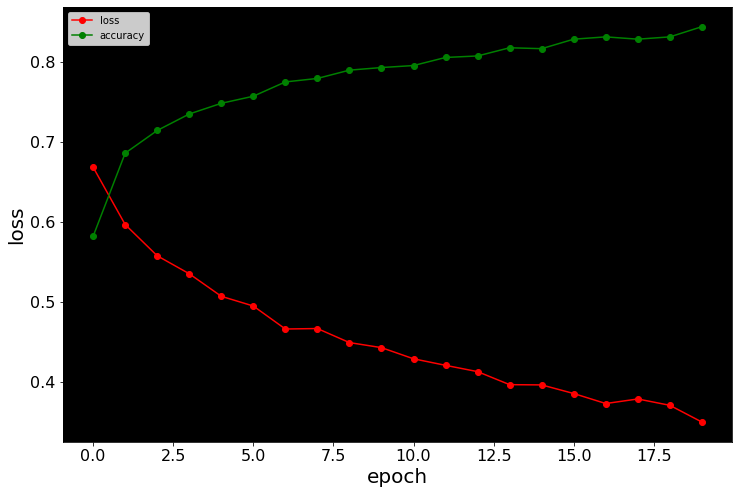

In [11]:
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor("k")
plt.plot(history.history["loss"], "o-", color="red", label="loss")
plt.plot(history.history["accuracy"], "o-", color="green", label="accuracy")
plt.xlabel("epoch", fontsize=20)
plt.ylabel("loss", fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend();

In [12]:
import numpy as np
from keras.preprocessing import image

In [13]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [14]:
test_image = image.load_img(
    "../data/single_prediction/cat_or_dog_1.jpg", target_size=(64, 64)
)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)

[[1.]]
